<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-01-18 20:52:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  62.4MB/s    in 3.2s    

2026-01-18 20:52:25 (62.3 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [21]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [22]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


       CompTotal
0      2040000.0
1        28000.0
2        85000.0
3        50000.0
4       110000.0
...          ...
33735    36000.0
33736    40000.0
33737    61000.0
33738    58000.0
33739    55000.0

[33740 rows x 1 columns]


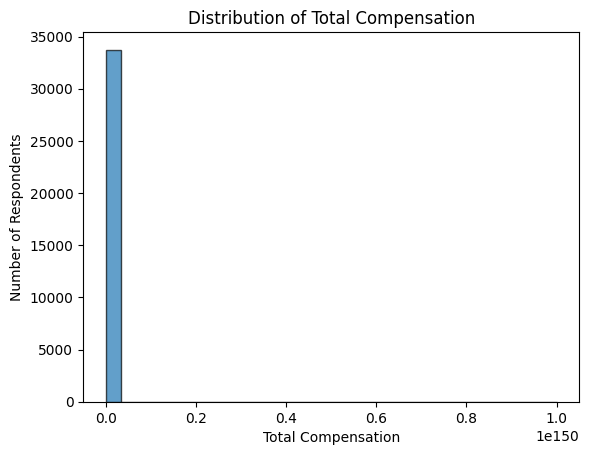

In [16]:
## Write your code here

QUERY = """
SELECT CompTotal
FROM main 
WHERE CompTotal IS NOT NULL
"""
df_comp = pd.read_sql_query(QUERY, conn)
print(df_comp)
df_comp['CompTotal'] = pd.to_numeric(df_comp['CompTotal'], errors='coerce')

plt.Figure(figsize=(12,6))
plt.hist(df_comp,bins = 30,
        alpha=0.7,          # Transparency
        edgecolor='black')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Total Compensation')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


       CompTotal
0      2040000.0
1        28000.0
2        85000.0
3        50000.0
4       110000.0
...          ...
33735    36000.0
33736    40000.0
33737    61000.0
33738    58000.0
33739    55000.0

[33740 rows x 1 columns]


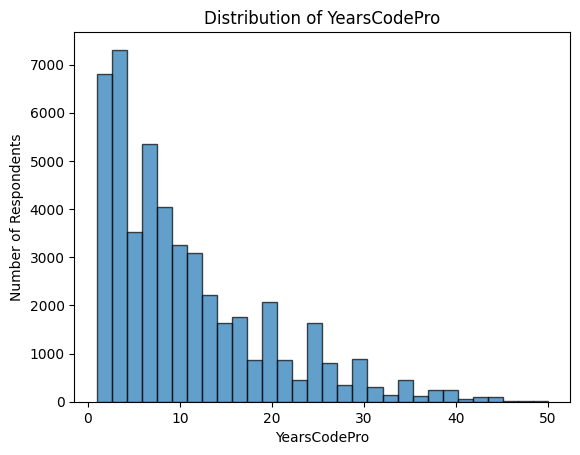

In [17]:
## Write your code here
QUERY = """
SELECT YearsCodePro
FROM main 
WHERE YearsCodePro IS NOT NULL
"""
df_code = pd.read_sql_query(QUERY, conn)
print(df_comp)
df_code['YearsCodePro'] = pd.to_numeric(df_code['YearsCodePro'], errors='coerce')

plt.Figure(figsize=(12,6))
plt.hist(df_code,bins = 30,
        alpha=0.7,          # Transparency
        edgecolor='black')
plt.xlabel('YearsCodePro')
plt.ylabel('Number of Respondents')
plt.title('Distribution of YearsCodePro')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


       CompTotal              Age
0      2040000.0  18-24 years old
1        28000.0  25-34 years old
2        85000.0  35-44 years old
3        50000.0  35-44 years old
4       110000.0  25-34 years old
...          ...              ...
33735    36000.0  18-24 years old
33736    40000.0  25-34 years old
33737    61000.0  25-34 years old
33738    58000.0  35-44 years old
33739    55000.0  45-54 years old

[33740 rows x 2 columns]


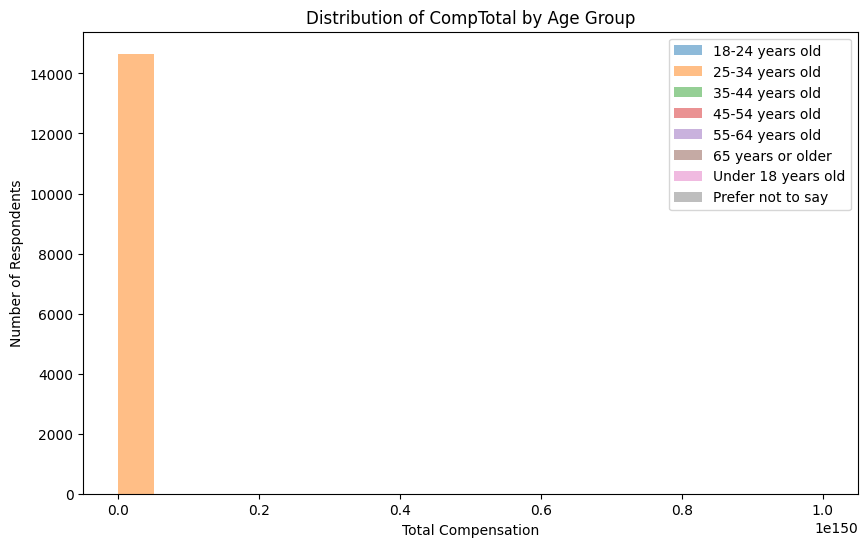

In [31]:
## Write your code here
QUERY = """
SELECT CompTotal,Age
FROM main 
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""
df_copm_age = pd.read_sql_query(QUERY, conn)
print(df_copm_age)
age_groups = df_copm_age['Age'].unique()
plt.figure(figsize=(10,6))

for age in age_groups:
    subset = df_copm_age[df_copm_age['Age'] == age]['CompTotal'].dropna()  # remove missing values
    plt.hist(subset, bins=20, alpha=0.5, label=age)
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.title('Distribution of CompTotal by Age Group')
plt.legend()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


                    TimeSearching              Age
0             30-60 minutes a day  35-44 years old
1             30-60 minutes a day  35-44 years old
2            60-120 minutes a day  45-54 years old
3             15-30 minutes a day  25-34 years old
4      Less than 15 minutes a day  25-34 years old
...                           ...              ...
28906         30-60 minutes a day  18-24 years old
28907        60-120 minutes a day  18-24 years old
28908  Less than 15 minutes a day  25-34 years old
28909         15-30 minutes a day  25-34 years old
28910         15-30 minutes a day  35-44 years old

[28911 rows x 2 columns]


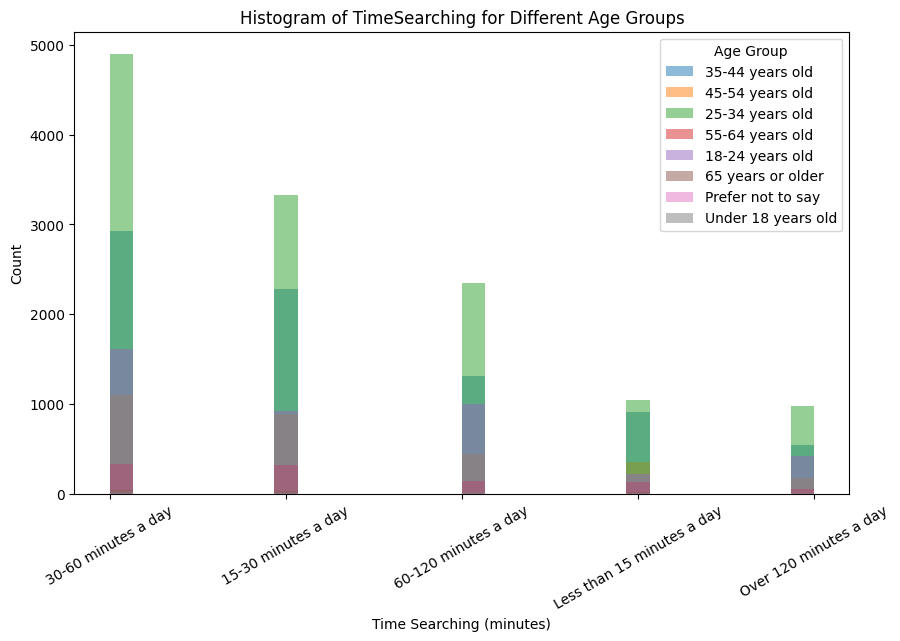

In [32]:
## Write your code here
QUERY = """
SELECT TimeSearching,Age
FROM main 
WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL
"""
df_time = pd.read_sql_query(QUERY, conn)
print(df_time)
age_groups = df_time['Age'].unique()
#df_code['TimeSearching'] = pd.to_numeric(df_code['YearsCodePro'], errors='coerce')

plt.figure(figsize=(10,6))

for age in age_groups:
    subset = df_time[df_time['Age'] == age]['TimeSearching'].dropna()
    plt.hist(subset ,alpha=0.5, bins=30, label=age)  # alpha for transparency

plt.title("Histogram of TimeSearching for Different Age Groups")
plt.xlabel("Time Searching (minutes)")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title='Age Group')
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


Index(['PostgreSQL', 'SQLite', 'MySQL', 'MongoDB', 'Redis'], dtype='object', name='DatabaseWantToWorkWith')


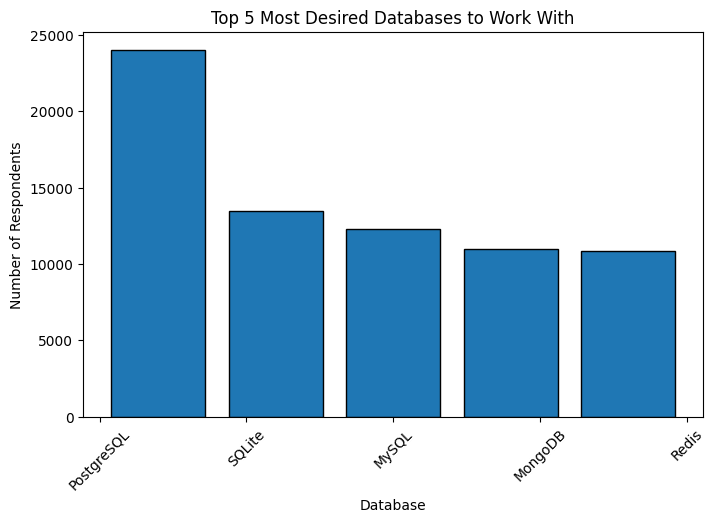

In [42]:
## Write your code here
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df_database = pd.read_sql_query(QUERY, conn)
df_database.head()
#split if multiple database
db_exploded = df_database['DatabaseWantToWorkWith'].str.split(';').explode()

#top5 database

top5_dbs = db_exploded.value_counts().head(5)
print(top_5_dbs.index)
data_for_hist = []
for db, count in top5_dbs.items():
    data_for_hist.extend([db] * count)
plt.figure(figsize=(8,5))
plt.hist(data_for_hist, bins=len(top5_dbs), edgecolor='black', rwidth=0.8)
plt.title("Top 5 Most Desired Databases to Work With")
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


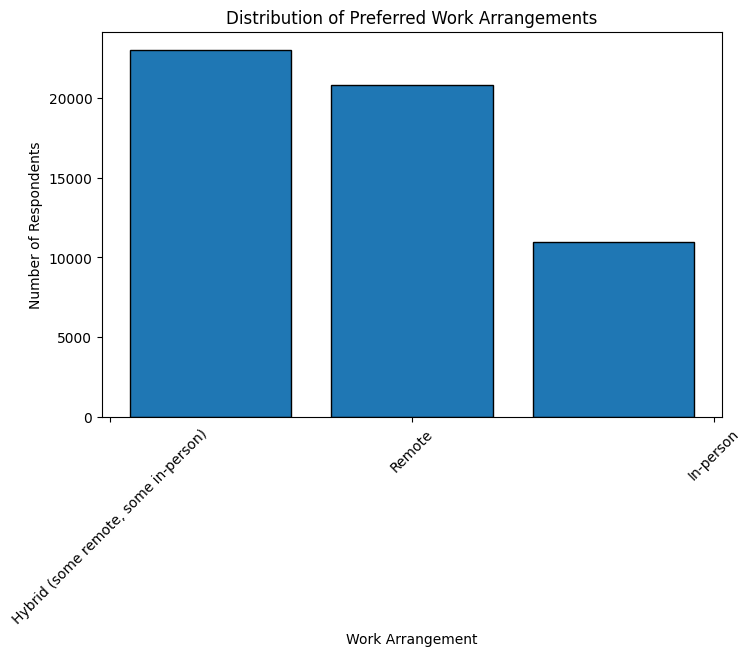

In [40]:
## Write your code here
QUERY = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df_remote = pd.read_sql_query(QUERY, conn)
# Count occurrences
work_counts = df_remote['RemoteWork'].value_counts()

# Repeat category names according to counts
data_for_hist = []
for arrangement, count in work_counts.items():
    data_for_hist.extend([arrangement] * count)
plt.figure(figsize=(8,5))
plt.hist(data_for_hist, bins=len(work_counts), edgecolor='black', rwidth=0.8)
plt.title("Distribution of Preferred Work Arrangements")
plt.xlabel("Work Arrangement")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)  # rotate labels for readability
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


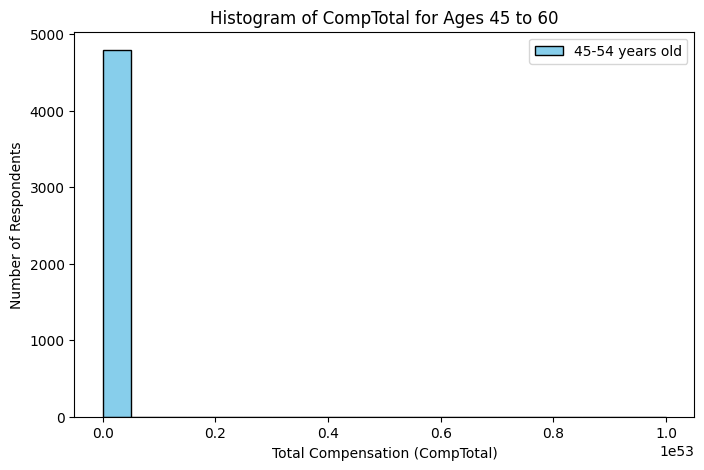

In [46]:
## Write your code here
QUERY = """
SELECT CompTotal, Age
FROM main
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""
df_age = pd.read_sql_query(QUERY, conn)
df_age.head()

mid_career_ages = ['45-54 years old', '55-64 years old']  # categories between 45 and 60
mid_career = df_age[df_age['Age'].isin(mid_career_ages)]['CompTotal'].dropna()
plt.figure(figsize=(8,5))
plt.hist(mid_career, bins=20, edgecolor='black', color='skyblue')
plt.title("Histogram of CompTotal for Ages 45 to 60")
plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Number of Respondents")
plt.legend(mid_career_ages)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


<Figure size 1000x600 with 0 Axes>

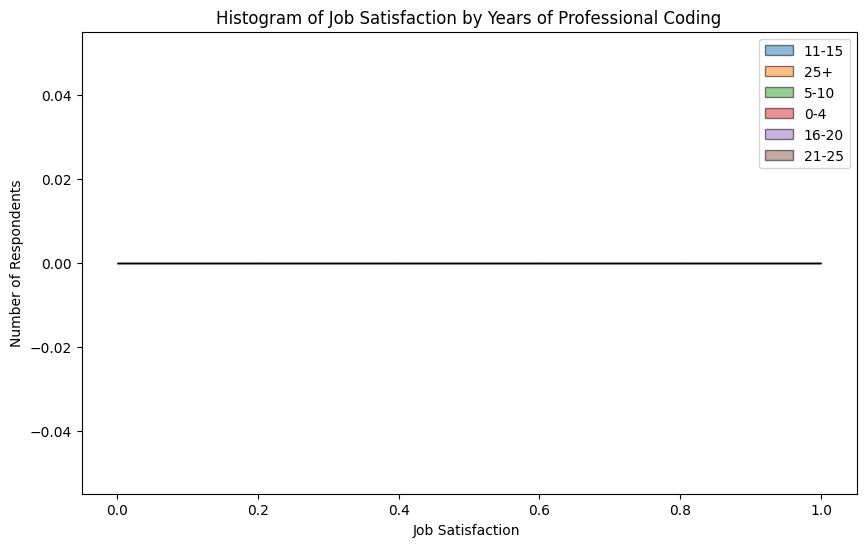

In [73]:
## Write your code here
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL
"""
df_job = pd.read_sql_query(QUERY, conn)
df_job_new = df_job[['JobSat', 'YearsCodePro']].dropna()
#has_string = df_job[df_job['YearsCodePro'].apply(lambda x: isinstance(x, str))]['YearsCodePro'].unique()
#print(has_string)

def convert_years(x):
    if pd.isna(x):
        return None
    x = str(x).strip()
    if x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":  # optional extreme case
        return 51
    else:
        try:
            return float(x)
        except:
            return None  # any other invalid string
df_job['YearsCodeProNum'] = df_job['YearsCodePro'].apply(convert_years)
bins = [0, 5, 10, 15, 20, 25, df_job['YearsCodeProNum'].max()+1]
labels = ['0-4', '5-10', '11-15', '16-20', '21-25','25+']

df_job['ExperienceGroup'] = pd.cut(df_job['YearsCodeProNum'], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(10,6))

experience_groups = df_job['ExperienceGroup'].unique()

plt.figure(figsize=(10,6))

for exp in experience_groups:
    subset = df_job[df_job['ExperienceGroup'] == years]['JobSat'].dropna()
    plt.hist(subset, bins=5, alpha=0.5, label=years, edgecolor='black')

plt.title("Histogram of Job Satisfaction by Years of Professional Coding")
plt.xlabel("Job Satisfaction ")
plt.ylabel("Number of Respondents")
plt.legend(experience_groups)
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
